In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Embora a regressão linear possa fazer um ótimo trabalho na modelagem de alguns conjuntos de dados, ela não pode ser usada para todos os conjuntos de dados. Primeiro, lembre-se de como a regressão linear modela um conjunto de dados. Ele modela a relação linear entre uma variável dependente y e as variáveis independentes x. 

Tem uma equação simples, de grau 1, por exemplo y = $2x$ + 3.


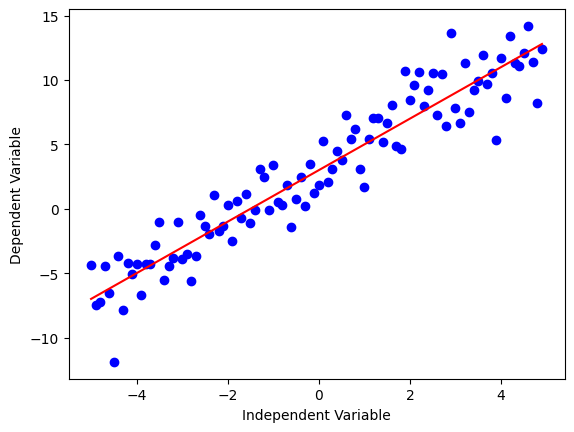

In [3]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
#plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

A regressão não linear é um método para modelar a relação não linear entre as variáveis independentes $x$ e a variável dependente $y$. 

Essencialmente, qualquer relação que não seja linear pode ser denominada como não linear e geralmente é representada pelo polinômio de $k$ graus (potência máxima de $x$). 

Por exemplo:

$$ \ y = a x^3 + b x^2 + c x + d \ $$

Funções não lineares podem ter elementos como exponenciais, logaritmos, frações e assim por diante.

Por exemplo: $$ y = \log(x)$$

Podemos ter uma função ainda mais complicada, como:
$$ y = \log(a x^3 + b x^2 + c x + d)$$


### Non-Linear Regression example

Importando os dados


In [2]:
#downloading datasethttps://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv

df = pd.read_csv("china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


Visualizando os dados 

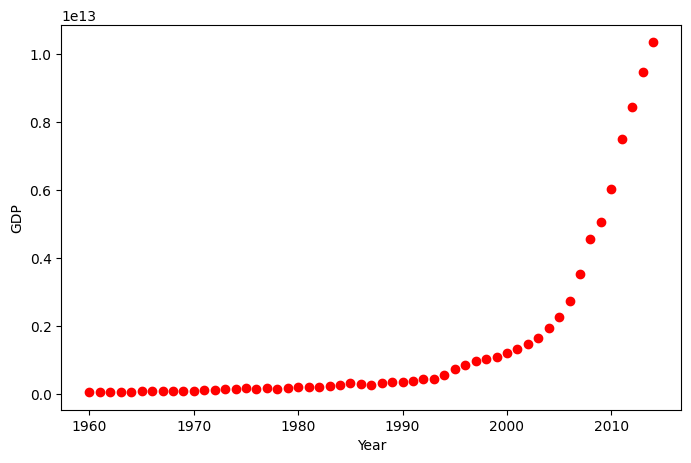

In [22]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

### Choosing a model

Nesse caso devemos escolher qual é a melhor função para nosso modelo.

Portanto devemos ter um conhecimento previo dos comportamento das funções 

Aqui poderivamos a primiera vista pensar em uma exponencial.

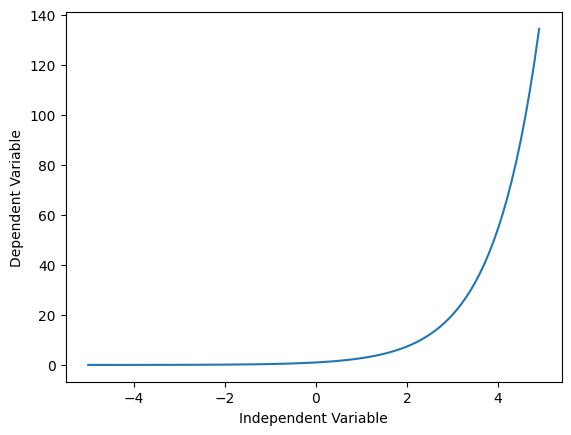

In [4]:
X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

Mas a melhjor nesse caso é a logistic function/sigmoid :

$$ Y = \frac{1}{1+e^{-\beta\_1(X-\beta\_2)}}$$

$\beta\_1$: Controls the curve's steepness,

$\beta\_2$: Slides the curve on the x-axis.


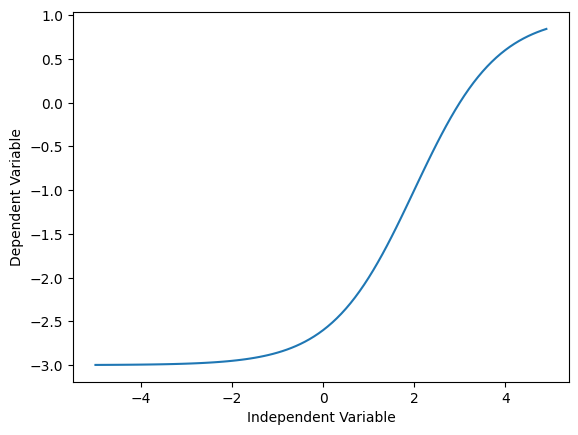

In [5]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

Definindo a função

In [6]:
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
    return y

Vamos olhar para como a função sigmóide  se encaixar nos dados:

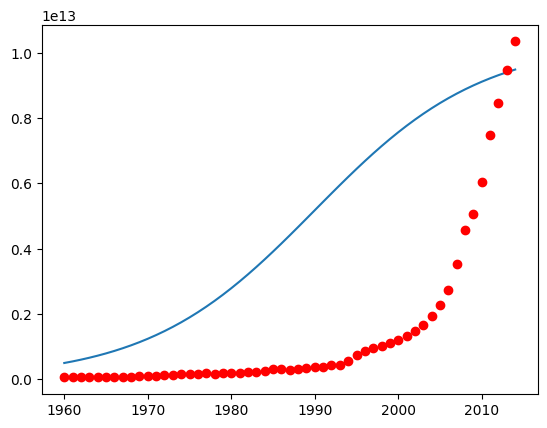

In [12]:
beta_1 = 0.10   # É escolhido valores aleatorio 
beta_2 = 1990.0 # É escolhido valores aleatorio 

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)  # xdata é o tempo 

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*y_data[-1]) 
# a sigmoid function  tem valo maximo até 1 portando temos que ajustar multiplicando por um valo maximo
# Ou podemos normalizaros pontos vermelho, mais não faz muito sentido aqui

plt.plot(x_data, y_data, 'ro')


Nossa tarefa aqui é encontrar os melhroes parametros para nosso modelo.

Para isso vamos normalizar os valores de x e y

In [13]:
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

Como podemos encontrar os melhores parametros para o fit da linha ?

Nospodemos usar **curve_fit** no qual usa não linear least squares para fitar a nossa função sigmoid .

Elee retorna dosi parametros  :

1° popt que é nosso parametros otimizados.

2° Não entendi.


In [19]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print( popt)
print( pcov)

[690.45171182   0.99720713]
[[ 1.52271494e+03 -2.88118935e-04]
 [-2.88118935e-04  7.25961451e-09]]


In [16]:
print(" beta_1 =", popt[0],"  beta_2 = ",popt[1])

 beta_1 = 690.4517118227653   beta_2 =  0.9972071272524615


Agora nos podemos fazer o plot dos resultado do modelo

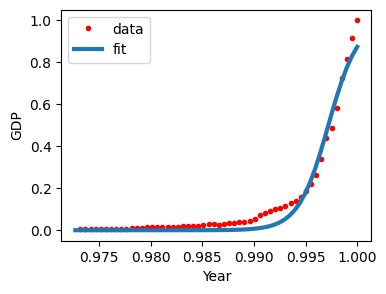

In [37]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(4,3))
y = sigmoid(x, *popt)


plt.plot(xdata, ydata, 'r.', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()